# **FINAL PROJECT 4** - Clustering

Kelompok 8 - PYTN 012
- DWI PUJINING TYAS
- NUR ANISAH
- FATIMAH ZAHRA

## Perkenalan



Dataset yang digunakan untuk analisis adalah CCData, yang tersedia di https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. Dataset ini mengumpulkan informasi tentang penggunaan kartu kredit oleh sebanyak 9000 pemegang kartu kredit aktif dalam kurun waktu 6 bulan terakhir.

Hal yang akan dianalisis dalam dataset ini adalah perilaku penggunaan kartu kredit oleh pelanggan. Data-data seperti saldo kartu kredit, frekuensi pembelian, jumlah pembelian, tarik tunai, batas kredit, dan pola pembayaran akan dipelajari untuk mendapatkan wawasan tentang kebiasaan penggunaan kartu kredit dan pola perilaku pelanggan.


Berikut adalah penjelasan singkat tentang kolom-kolom yang ada dalam dataset CCData:

* CUST_ID: ID unik untuk setiap pemegang kartu kredit.

* BALANCE: Saldo yang tersisa pada kartu kredit.

* BALANCE_FREQUENCY: Frekuensi pembaruan saldo, diukur dari 0 hingga 1. Nilai 1 menunjukkan pembaruan saldo yang sering, sementara nilai 0 menunjukkan pembaruan saldo yang jarang.

* PURCHASES: Jumlah total pembelian yang dilakukan dengan kartu kredit.

* ONEOFF_PURCHASES: Jumlah total pembelian satu kali (one-off) yang dilakukan dengan kartu kredit.

* INSTALLMENTS_PURCHASES: Jumlah total pembelian dengan angsuran yang dilakukan dengan kartu kredit.

* CASH_ADVANCE: Jumlah total penarikan uang tunai dengan kartu kredit.

* PURCHASES_FREQUENCY: Frekuensi pembelian, diukur dari 0 hingga 1. Nilai 1 menunjukkan frekuensi pembelian yang tinggi, sementara nilai 0 menunjukkan frekuensi pembelian yang rendah.

* ONEOFF_PURCHASES_FREQUENCY: Frekuensi pembelian satu kali (one-off), diukur dari 0 hingga 1. Nilai 1 menunjukkan frekuensi pembelian satu kali yang tinggi, sementara nilai 0 menunjukkan frekuensi pembelian satu kali yang rendah.

* PURCHASES_INSTALLMENTS_FREQUENCY: Frekuensi pembelian dengan angsuran, diukur dari 0 hingga 1. Nilai 1 menunjukkan frekuensi pembelian dengan angsuran yang tinggi, sementara nilai 0 menunjukkan frekuensi pembelian dengan angsuran yang rendah.

* CASH_ADVANCE_FREQUENCY: Frekuensi penarikan uang * tunai, diukur dari 0 hingga 1. Nilai 1 menunjukkan frekuensi penarikan uang tunai yang tinggi, sementara nilai 0 menunjukkan frekuensi penarikan uang tunai yang rendah.

* CASH_ADVANCE_TRX: Jumlah transaksi penarikan uang tunai.

* PURCHASES_TRX: Jumlah transaksi pembelian.

* CREDIT_LIMIT: Batas kredit yang ditetapkan pada kartu kredit.

* PAYMENTS: Jumlah total pembayaran yang dilakukan oleh pemegang kartu kredit.

* MINIMUM_PAYMENTS: Jumlah pembayaran minimum yang harus dibayarkan setiap bulan.

* PRC_FULL_PAYMENT: Persentase pembayaran penuh yang dilakukan oleh pemegang kartu kredit.

* TENURE: Jangka waktu pemegang kartu kredit (dalam bulan).

## Import Libraries

In [2]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
import sklearn
from sklearn import metrics

#For Transform Data
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# For Modelling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
import plotly.graph_objs as go

# For ignore warning
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
df = pd.read_csv("dataset/CC GENERAL.csv")

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

## Data Cleaning

### Dealing with Missing Values

In [9]:
# Checking Null Values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

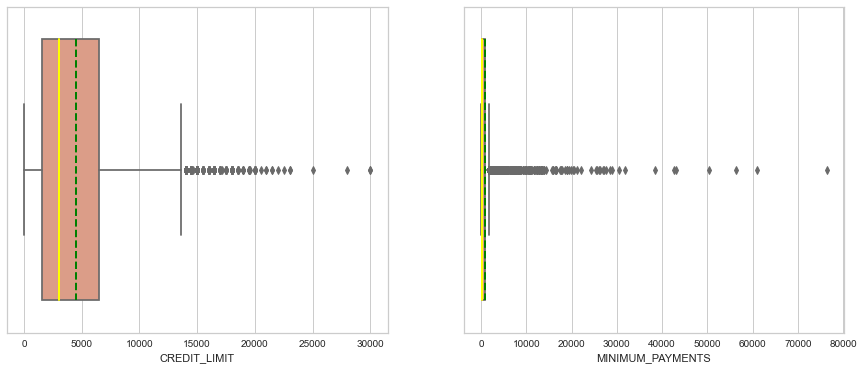

In [10]:
fig, axs = plt.subplots(1,2,figsize=(15, 6))

sns.boxplot(df['CREDIT_LIMIT'], ax = axs[0], color='darksalmon',
          showmeans = True,
          meanline = True,
          medianprops = {'linewidth':2, 'color':'yellow'},
          meanprops = {'linewidth':2, 'color':'green'})

sns.boxplot(df['MINIMUM_PAYMENTS'], ax = axs[1], color='darksalmon',
          showmeans = True,
          meanline = True,
          medianprops = {'linewidth':2, 'color':'yellow'},
          meanprops = {'linewidth':2, 'color':'green'})


Dari hasil pengecekan missing values pada kolom-kolom di atas, di dapati bahwa hanya ada dua kolom yang memiliki missing values, yaitu PAYMENTS dengan jumlah missing 1 values dan MiINIMUM_PAYMENTS dengan jumlah missing 313 values.
Dari hasil tersebut dapat dicurigai bahwa penyebab adanya banyak missing value hanya pada kolom MINIMUM_PAYMENTS adalah karena beberapa data pada kolom tersebut memang tidak memiliki nilai, atau bernilai nol.

Kolom MINIMUM_PAYMENTS menampilkan data jumlah pembayaran minimum yang harus dibayarkan setiap bulan, kolom ini berhubungan dengan kolom PAYMENTS yang merupakan Jumlah total pembayaran yang dilakukan oleh pemegang kartu kredit. Oleh karena itu, dilakukan pengecekan pada nilai kolom PAYMENTS.

In [11]:
df['PAYMENTS'].value_counts(ascending=False)


0.000000        240
201.802084        1
398.316441        1
826.036748        1
2571.573214       1
               ... 
14176.748670      1
6200.550587       1
1877.023036       1
372.093413        1
63.165404         1
Name: PAYMENTS, Length: 8711, dtype: int64

Dari hasil yang ditampilkan diatas, terlihat bahwa ada sebanyak 240 data yang memiliki jumlah pembayaran sebesar 0.00.
Oleh karenanya, dapat disimpulkan bahwa banyaknya nilai null pada kolom MINIMUM_PAYMENTS bukan disebabkan adanya nilai yang hilang atau data yang tidak lengkap, melainkan memang data tersebut bernilai nol dikarenakan jumlah pembayaran yang dilakukan oleh pemegang kartu kredit bernilai nol. Sehingga value yang digunakan untuk mengisi missing value adalah 0.

In [12]:
# Replace missing categorical variables with 0
df['CREDIT_LIMIT'].fillna(0, inplace=True)
df['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

In [13]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Dealing with Duplicated Values

In [14]:
df.duplicated().sum()

0

### Dropping Variables

In [15]:
# Menghapus kolom CUST_ID karena kolom tersebut tidak dibutuhkan dalam analisis
df= df.drop(['CUST_ID'], axis=1)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

## EDA & Visualization

### TENURE Percentage


Text(0.5, 1.15, 'Tenure Percentage')

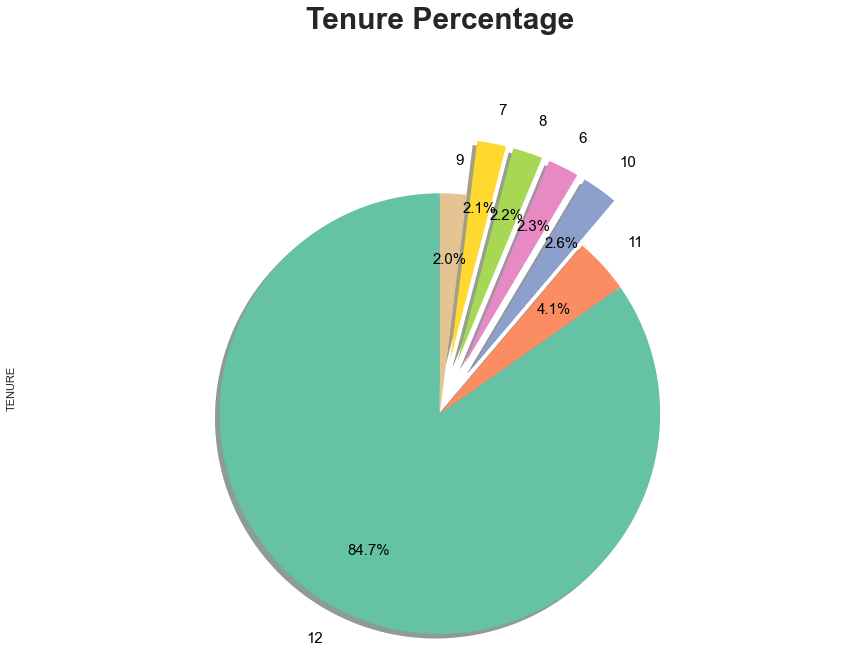

In [16]:
ax = plt.axes()
ax.set_facecolor("lightblue")

df['TENURE'].value_counts().plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    pctdistance=0.7,
    labeldistance = 1.15,
    colors = sns.color_palette('Set2'),
    textprops={'fontsize': 15,'color':'black'},
    explode = [0.0,0.0,0.25,0.25,0.25,0.25,0.0])

plt.axis('equal')
plt.title("Tenure Percentage", y=1.15, weight='bold',size='30')

Dari visualisasi diatas menunjukkan bahwa sebagian besar pengguna kartu kredit adalah pemegang kartu dengan masa jabatan selama 12 bulan atau satu tahun, ditujukan dengan presentase 84.7%

### Checking outliers in Numerical Columns

In [17]:
num = [var for var in df.columns if df[var].dtype !='O']
print('Numerical Variables:', num)

Numerical Variables: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


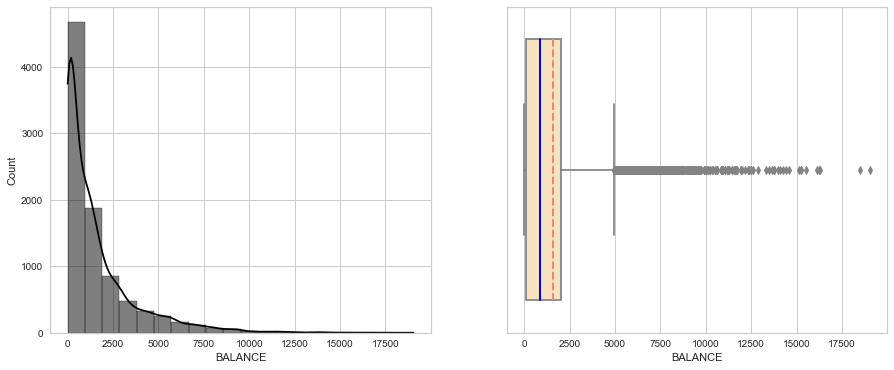

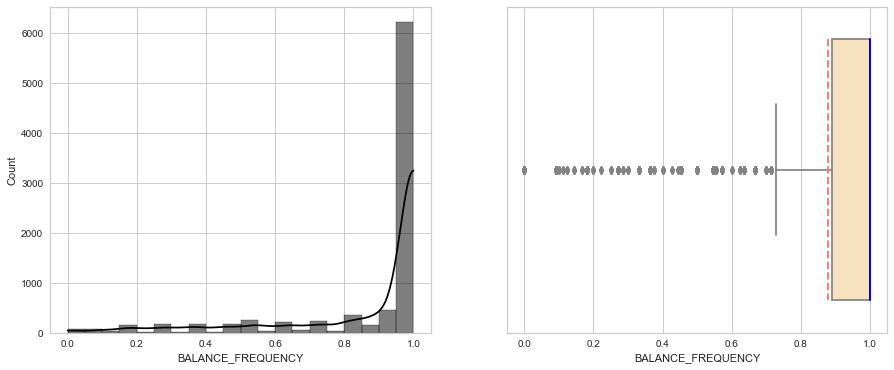

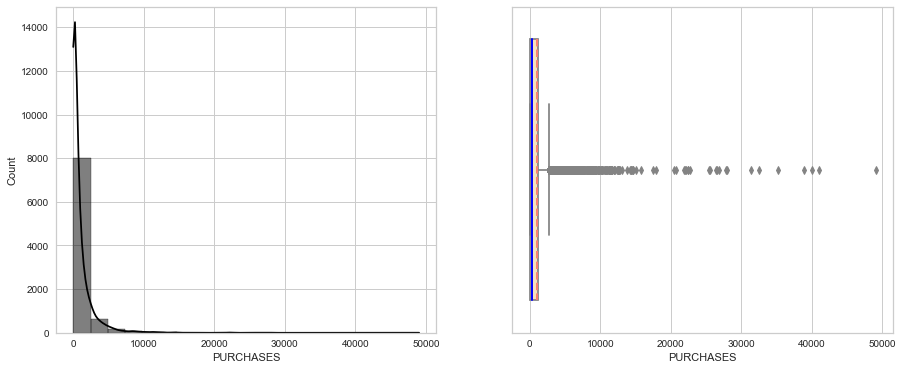

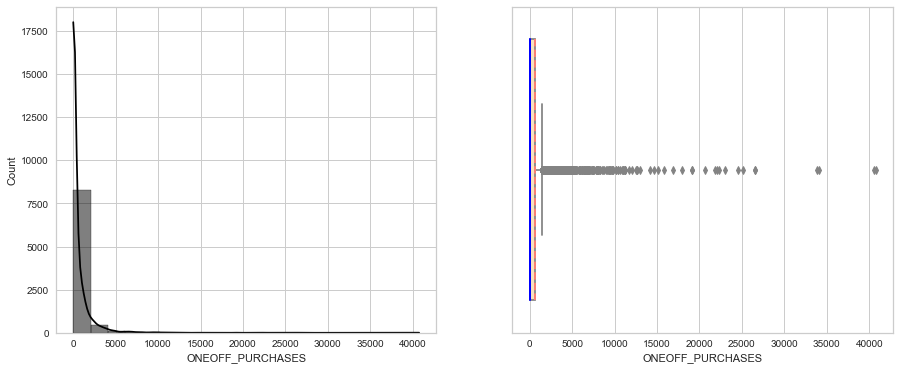

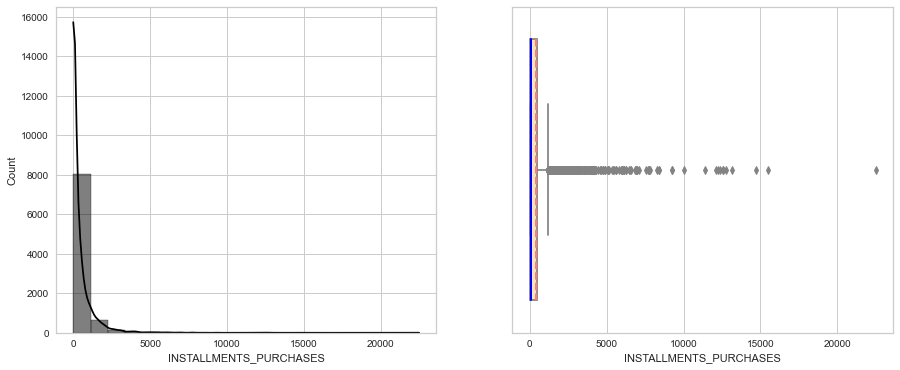

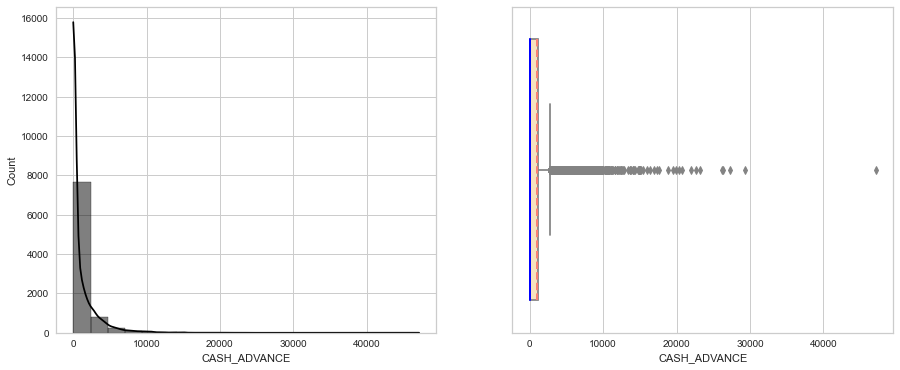

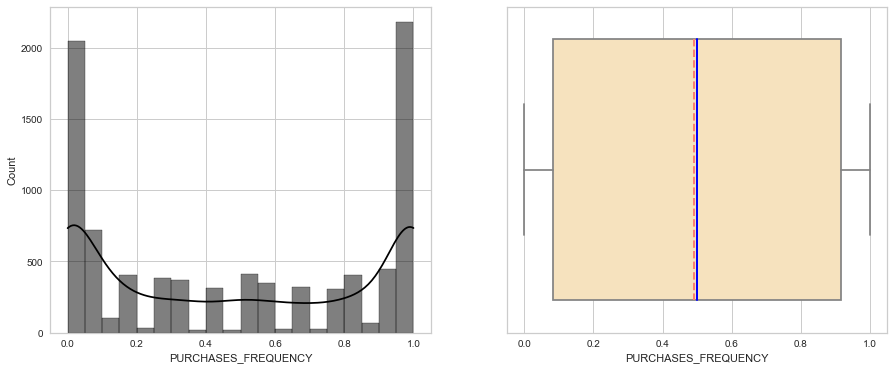

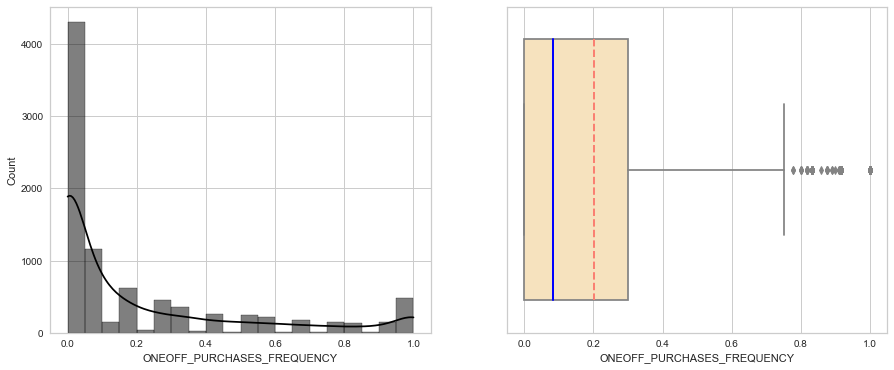

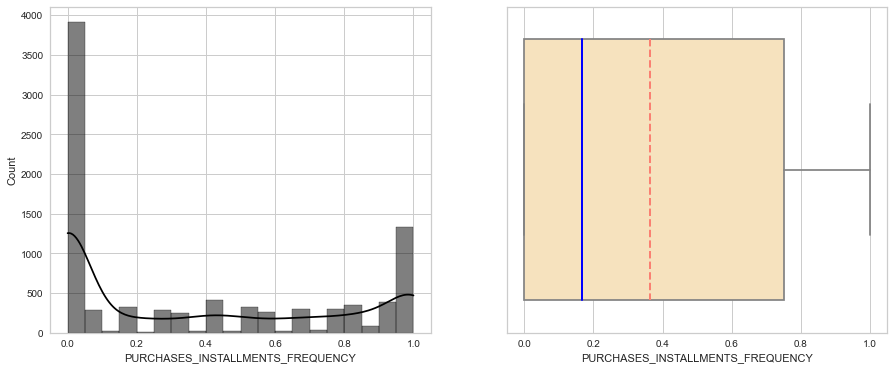

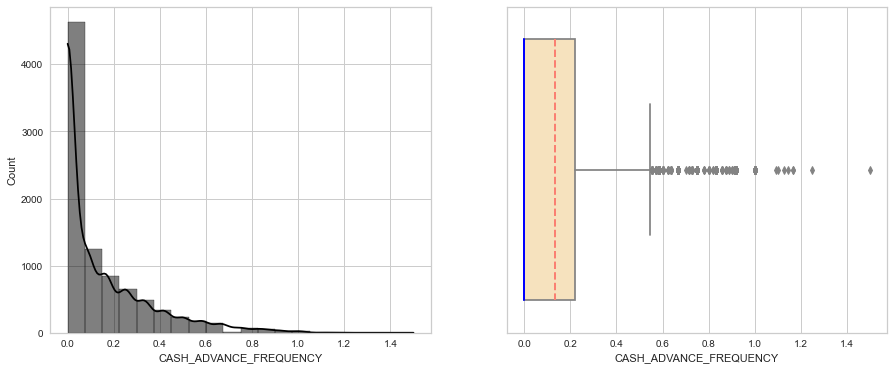

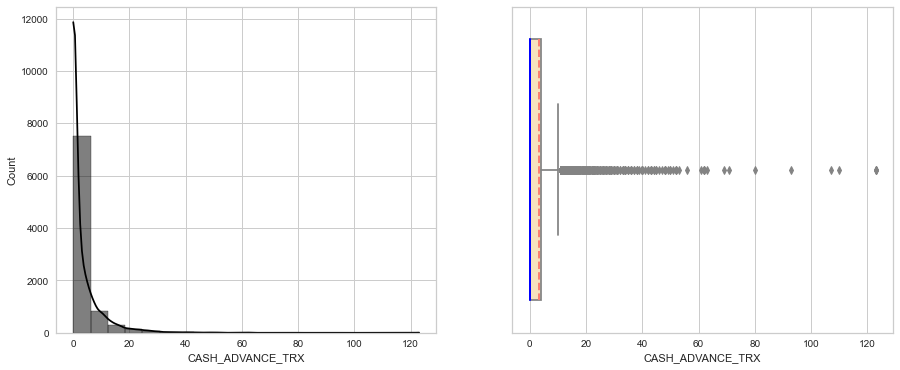

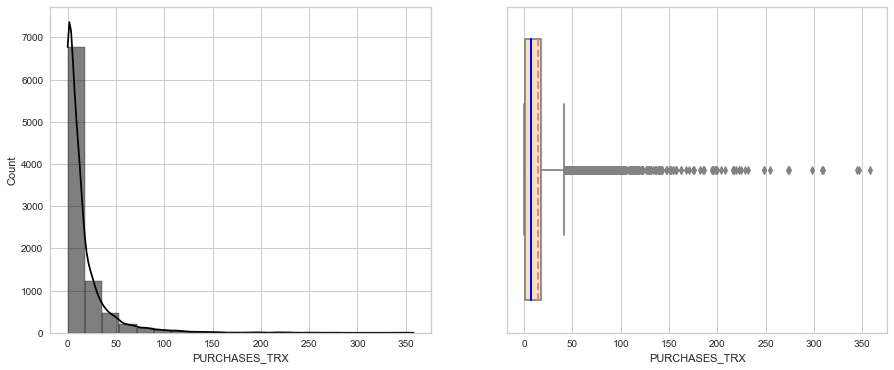

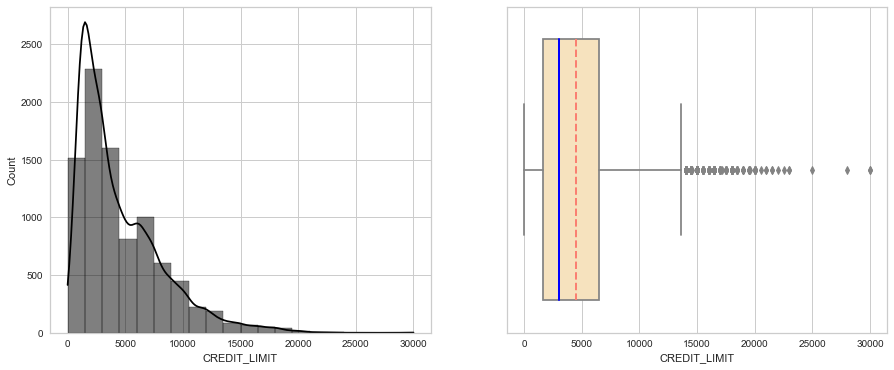

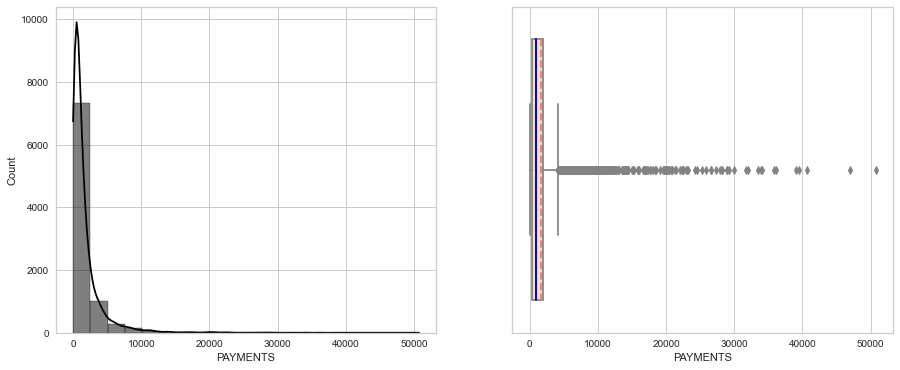

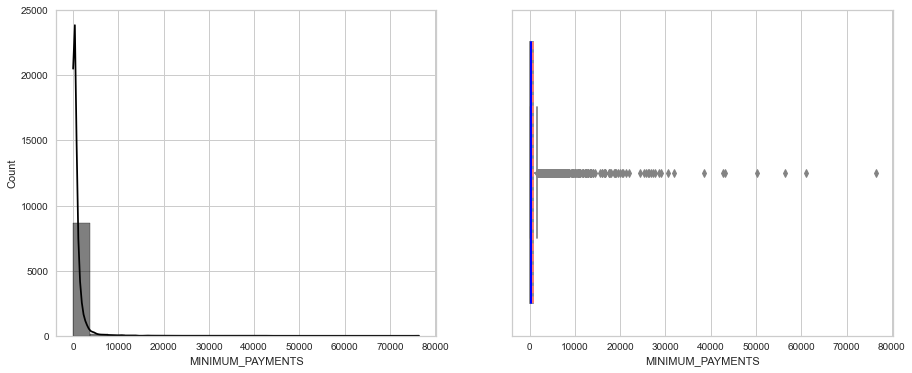

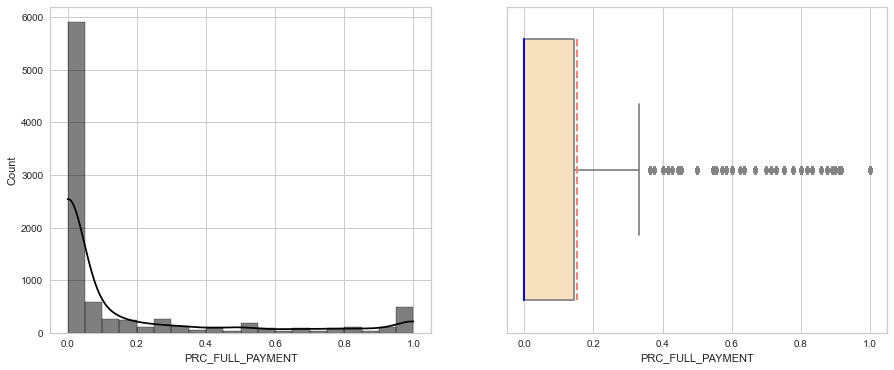

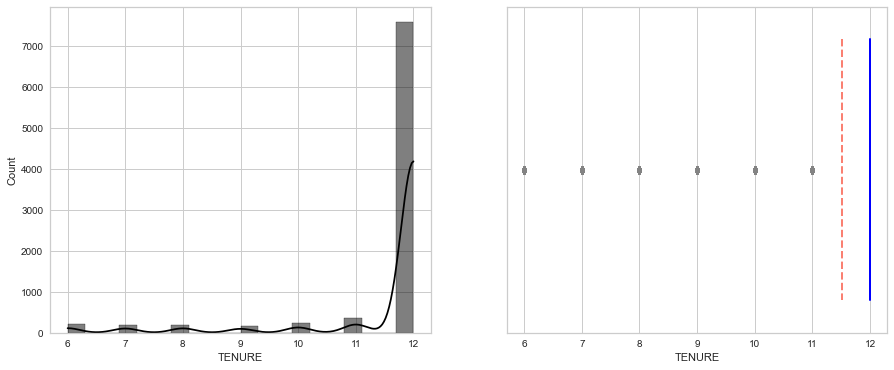

In [18]:
for i in num:
    fig, axs = plt.subplots(1,2,figsize=(15, 6))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0], color = 'black');
    sns.boxplot(df[i], ax = axs[1], color='moccasin',
          showmeans = True,
          meanline = True,
          medianprops = {'linewidth':2, 'color':'blue'},
          meanprops = {'linewidth':2, 'color':'salmon'})

### Bivariate Analysis

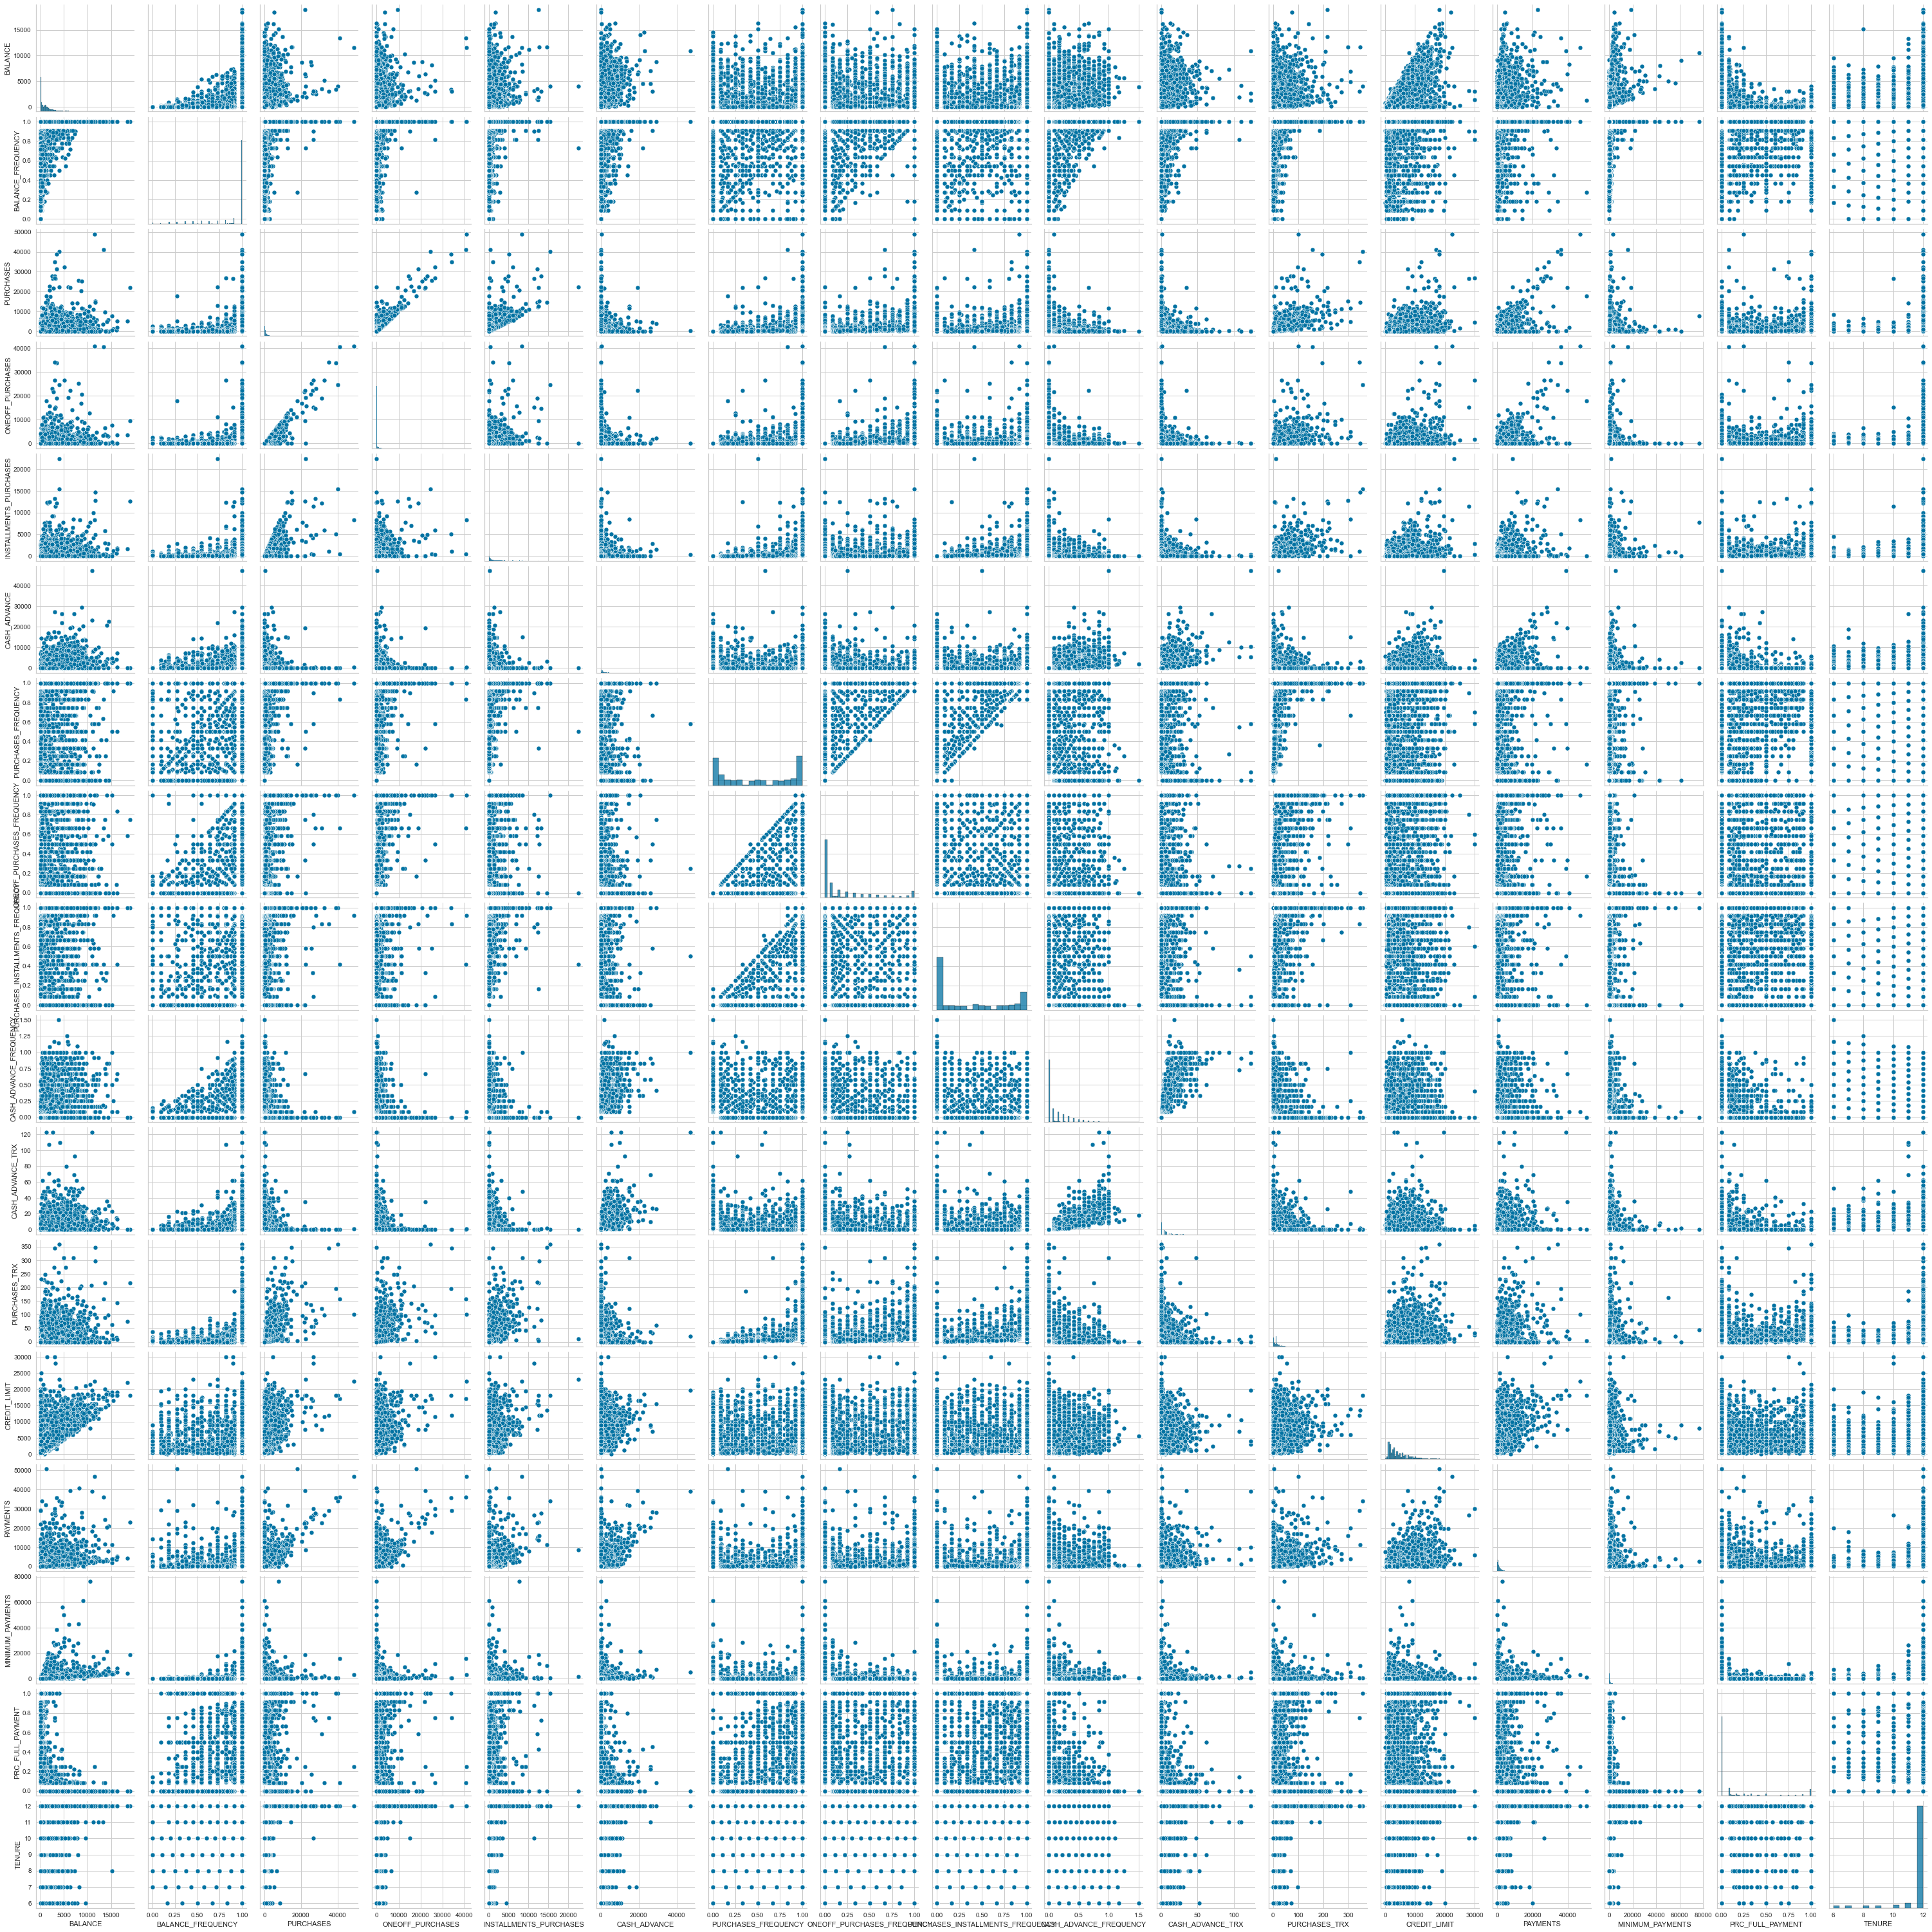

In [19]:
sns.pairplot(df)
plt.show()

Berdasarkan visualisasi diatas, didapatkan kesimpulan antara lain:

  - BALANCE dan CREDIT_LIMIT memiliki korelasi positif, sehingga jika credit limit meningkat, balance juga meningkat
  - PURCHASES, ONOFF_PURCHASES, dan INSTALMENTS_PURCHASES memiliki korelasi positif, sehingga jika purhases meningkat, onoff purchases dan installments purchases juga meningkat
  - PAYMENTS dan PURHASES memiliki korelasi positif, sehingga jika purchases meningkat, payments juga meningkat

### Correlation Analysis

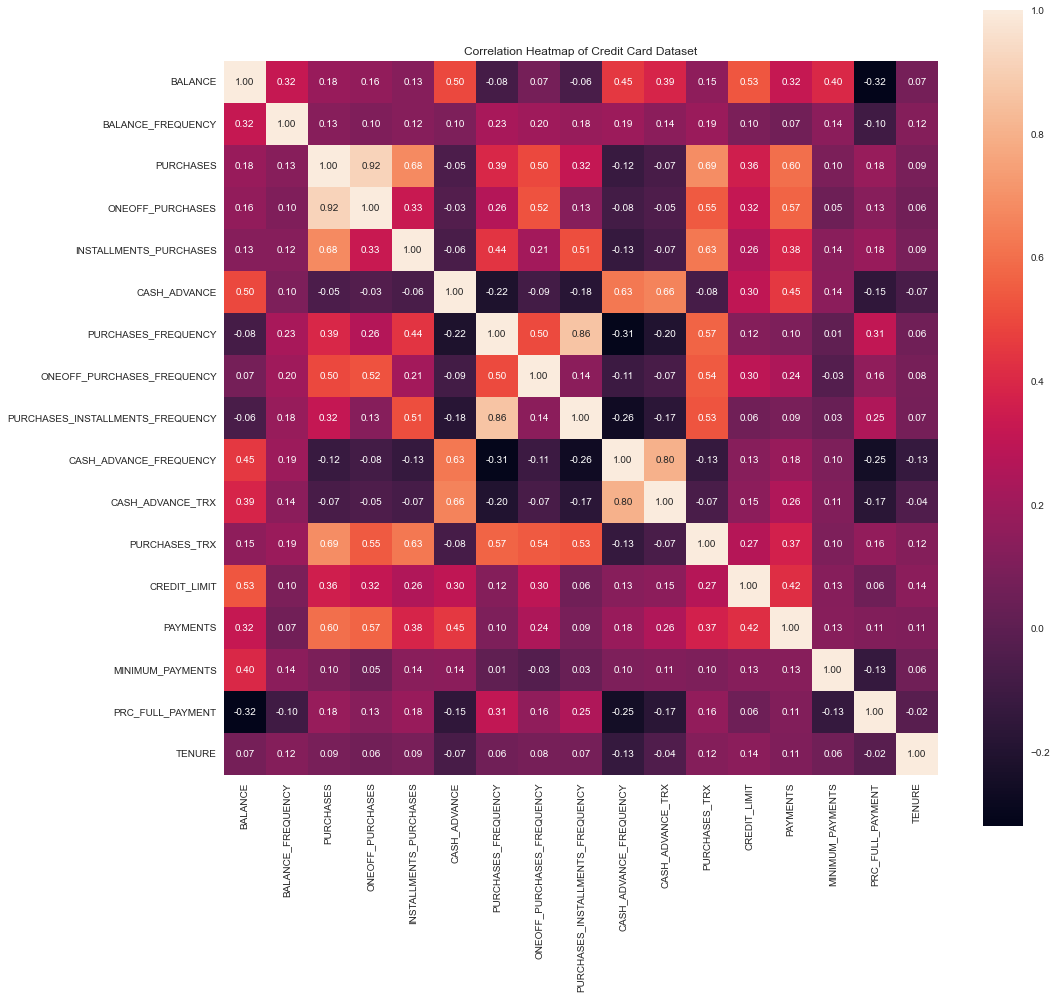

In [20]:
plt.figure(figsize=(16,15))
plt.title('Correlation Heatmap of Credit Card Dataset')
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())
plt.show()

Berdasarkan Heatmap di atas, dapat diketahui bahwa:
 - Purchases,oneoff_purchases dan installments_purchase purchases memiliki nilai korelasi yang tinggi
 - Purchses_installments_frequency dan Purchses_frequency saling berkorelasi tinggi
 - Cash_Advance_TRX dan cash_Advance_frequency saling berkorelasi tinggi

## Data Preprocessing

Setelah dilakukan analisis eksploratori, didapatkan hasil bahwa terdapat nilai outliers yang berlebihan pada data. Selain itu, data juga memiliki distribusi yang tidak simetris dan diatur dalam skala yang berbeda. Untuk mengatasi hal tersebut, maka dilakukan standarisasi dan normalisasi data

### Normalizing the Data

In [21]:
pt = PowerTransformer()
df_new1 = pt.fit_transform(df)

### Standardizing the data

In [22]:
scaler = StandardScaler()
df_new2 = scaler.fit_transform(df_new1)
df_new2.shape

(8950, 17)

## Modelling

### **KMeans Clustering**

Algoritma ini bekerja dengan membagi data ke dalam k kelompok berdasarkan jarak antara titik data dan pusat kelompok, serta secara interaktif menetapkan setiap titik ke kelompok terdekat dan menghitung ulang pusat kelompok hingga kelompok tidak berubah lagi.


**Metode Elbow (Siku)**: Metode ini merupakan metode yang digunakan untuk memilih jumlah kluster optimal dalam algoritma K-means clustering. Metode ini melibatkan pembuatan grafik nilai inersia (skor distorsi), yang merupakan jumlah jarak kuadrat antara sampel dengan pusat kelompok terdekat, berdasarkan jumlah kelompok, dan pemilihan titik tikungan atau "siku" dalam kurva sebagai nilai k terbaik. Biasanya, titik ini adalah titik di mana inersia mulai menurun dengan kecepatan yang lebih lambat, menunjukkan bahwa penambahan lebih banyak kelompok tidak akan secara signifikan meningkatkan kualitas pengelompokan.

#### The Elbow Method

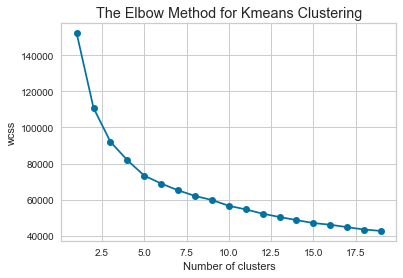

In [23]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss, marker='o')
plt.style.use('ggplot')
plt.title('The Elbow Method for Kmeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


Dari grafik elbow method di atas, dapat dilihat bahwa posisi elbow point atau posisi siku berada diantara 2, 3, 4, dan 5. Maka dari itu, perlu dilakukan analisis silhouette untuk mengetahui jumlah cluster yang paling baik.

#### Silhouette Analysis

Silhouette Coefficient/Score adalah metrik yang digunakan untuk menghitung kinerja clustering. Nilainya berkisar dari -1 hingga 1. Semakin tinggi skornya, semakin baik. 1 berarti cluster terpisah satu sama lain dan dibedakan dengan jelas. 0 berarti klaster acuh tak acuh/jarak antar klaster tidak signifikan. -1 berarti cluster ditugaskan dengan cara yang salah.

Setelah menghitung koefisien siluet dari setiap titik dalam kumpulan data, plotlah untuk mendapatkan representasi visual tentang seberapa baik kumpulan data tersebut dikelompokkan menjadi k cluster

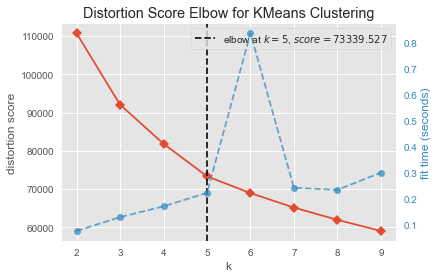

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
kmeans = KMeans(random_state=42)
kmeans.fit(df_new2)

labels = kmeans.labels_

visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(df_new2)
visualizer.show()


Data diatas adalah visualisasi yang menampilkan Siku / SSE Plot. Sesuai plot yang diberikan di atas, untuk n_clusters = 5 yang mewakili siku.



*   Silhouette Scores






In [25]:
for num_clusters in list(range(2,10)):
  model_clus = KMeans(n_clusters=num_clusters,random_state=42)
  model_clus.fit(df_new2)

  cluster_labels = model_clus.labels_

  silhouette_avg = silhouette_score(df_new2,cluster_labels)
  print('For n_clusters = {0}, the silhouette score is {1}'.format(num_clusters,silhouette_avg))

For n_clusters = 2, the silhouette score is 0.26204824444370534
For n_clusters = 3, the silhouette score is 0.23637486229328877
For n_clusters = 4, the silhouette score is 0.22985199540700715
For n_clusters = 5, the silhouette score is 0.24278817848036088
For n_clusters = 6, the silhouette score is 0.23628174534035665
For n_clusters = 7, the silhouette score is 0.20900857264230718
For n_clusters = 8, the silhouette score is 0.21815675123509393
For n_clusters = 9, the silhouette score is 0.21598208825405993




*   Silhouette Plots



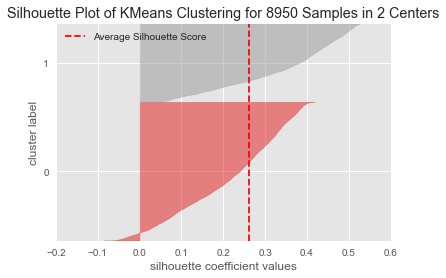

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
silhouette_2clust = KMeans(n_clusters = 2, random_state=42)

sil_visualizer = SilhouetteVisualizer(silhouette_2clust)
sil_visualizer.fit(df_new2)
sil_visualizer.show()

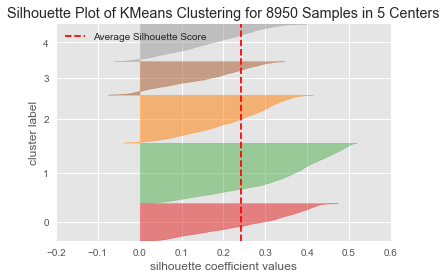

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
silhouette_5clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(silhouette_5clust)
sil_visualizer.fit(df_new2)
sil_visualizer.show()

Berdasarkan silhouette scores di atas, didapatkan bahwa n_clusters dengan nilai 2 memiliki silhouette scores tertinggi, sedangkan n_clusters dengan nilai 5 memiliki silhouette scores kedua tertinggi. Namun, jika dilihat dari visualisasi  silhouette plot, didapatkan bahwa n_clusters=5 memiliki ukuran ketebalan yang mirip di setiap plotnya. Dengan begitu, 'k' terbaik untuk model ini adalah 5

In [28]:
# Kmeans using 5 clusters and k-means++ initialization
km = KMeans(n_clusters=5, init='k-means++', random_state = 42)
km.fit(df_new2)
y_km_pred = km.predict(df_new2)
labels=km.labels_
y_km_pred

array([2, 1, 3, ..., 2, 1, 3], dtype=int32)

#### Tabel distribusi data dalam setiap cluster

In [29]:
df_kmeans=pd.DataFrame(df_new2, columns=df.columns)
df_kmeans['clusters'] = y_km_pred
df_kmeans.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.238103          -1.079348  -0.368050         -1.000488   
1  1.051961          -0.424939  -1.505149         -1.000488   
2  0.860616           0.628612   0.521657          1.065381   
3  0.570542          -1.710851   0.875823          1.229556   
4  0.111925           0.628612  -0.904786         -0.019902   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.383704     -0.944538            -0.766859   
1               -1.085422      1.399909            -1.278866   
2               -1.085422     -0.944538             1.218860   
3               -1.085422      0.680451            -1.015926   
4               -1.085422     -0.944538            -1.015926   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.903315                         -0.606642   
1                   -0.903315                         -1.004445   
2                    1.732554                         -1.004445   
3                   -0.092230                         -1.004445   
4                   -0.092230                         -1.004445   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.883204         -0.905801      -0.573664     -1.409190   
1                1.124423          1.044342      -1.387624      0.920833   
2               -0.883204         -0.905801       0.494757      1.010406   
3                0.136071          0.194580      -0.872718      1.010406   
4               -0.883204         -0.905801      -0.872718     -1.206238   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  clusters  
0 -0.983876         -0.605487         -0.677889  0.422252         2  
1  1.285321          0.817511          1.235021  0.422252         1  
2 -0.291722          0.401218         -0.677889  0.422252         3  
3 -2.782085         -2.731787         -0.677889  0.422252         3  
4 -0.231669         -0.254873         -0.677889  0.422252         3

Berdasarkan tabel distribusi data diatas dengan keluaran 5 baris pertama, dapat disimpulkan bahwa:
- BALANCE pada cluster 2 menunjukkan skor minus sebesar 	-1.238103 yang berarti BALANCE pada cluster 2 cenderung lebih rendah dari rata-rata cluster (centroid) dibandingkan dengan BALANCE pada cluster 1 & 3 yang menunjukkan skor positif atau cenderung lebih tinggi dari rata-rata cluster (centroid).
- TENURE disetiap clusternya menunjukkan skor cenderung lebih tinggi dari rata-rata cluster (centroid).
- PURCHASES_INSTALLMENTS_FREQUENCY dalam setiap clusternya menunjukkan skor cenderung lebih rendah dari rata-rata cluster(centroid).
- Skor BALANCE_FREQUENCY sebesar 0.628612	pada cluster 3 cenderung lebih tinggi dari rata-rata cluster (centroid) dibandingkan dengan skor BALANCE_FREQUENCY pada cluster lainnya yang cenderung lebih rendah dari rata-rata cluster.
- INSTALLMENTS_PURCHASES pada cluster 2 cenderung lebih tinggi dari rata-rata cluster dengan skor sebesar 0.383704	dibandingkan dengan INSTALLMENTS_PURCHASES pada cluster 1 & 3.
- skor PRC_FULL_PAYMENT pada cluster 1 cenderung lebih tinggi dari rata-rata cluster (centroid) dibandingkan dengan skor PRC_FULL_PAYMENT pada cluster 2 & 3.

In [30]:
df_kmeans['clusters'].value_counts()

1    2496
2    1975
4    1550
0    1547
3    1382
Name: clusters, dtype: int64

#### Interpretation of Clusters

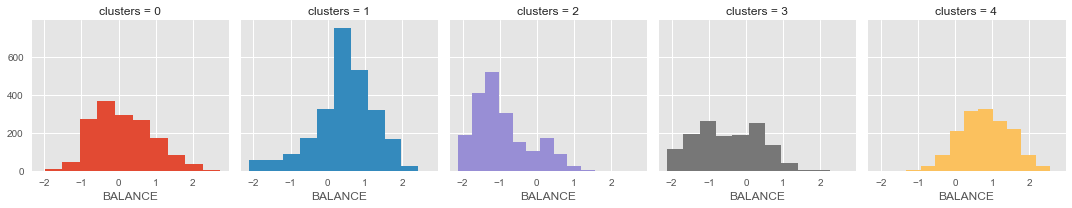

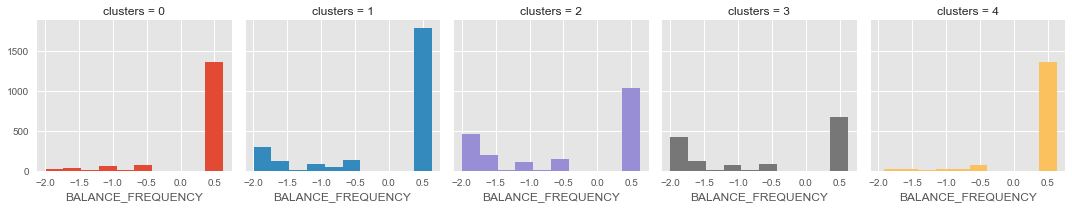

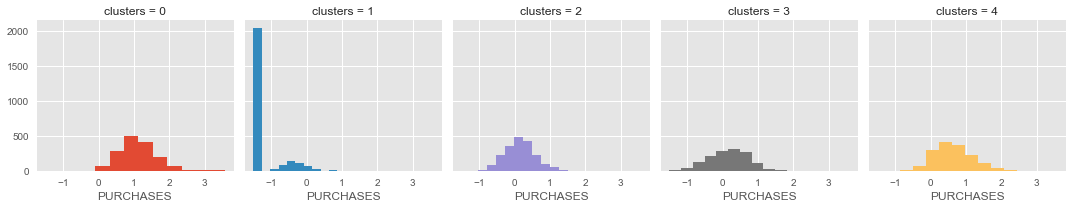

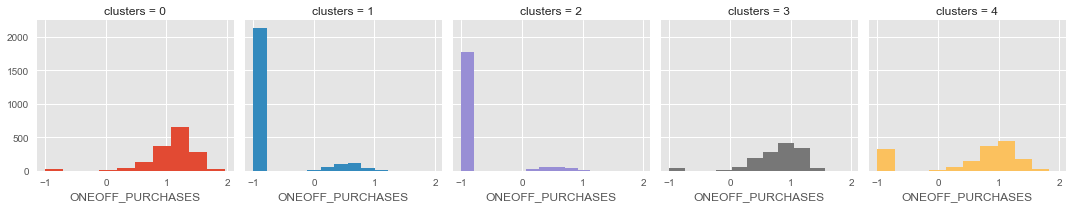

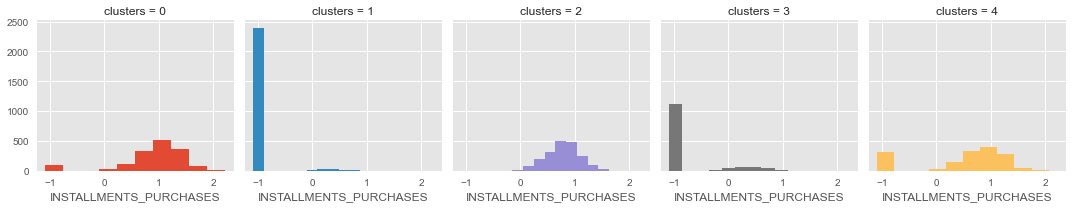

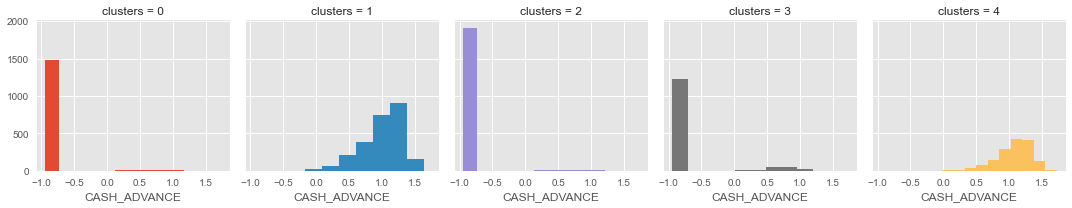

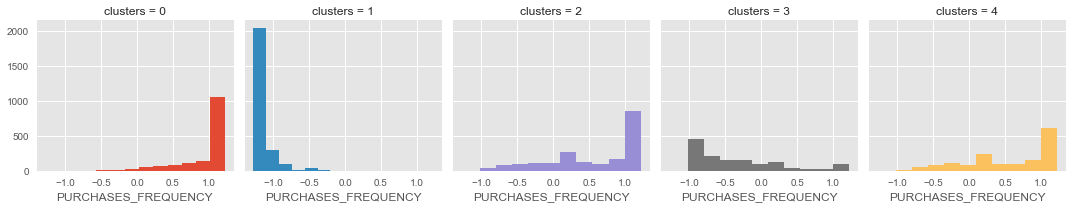

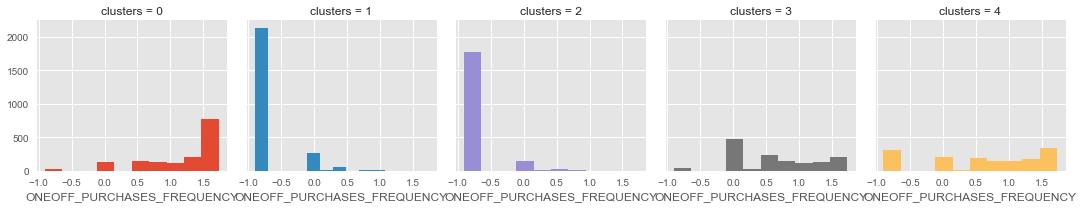

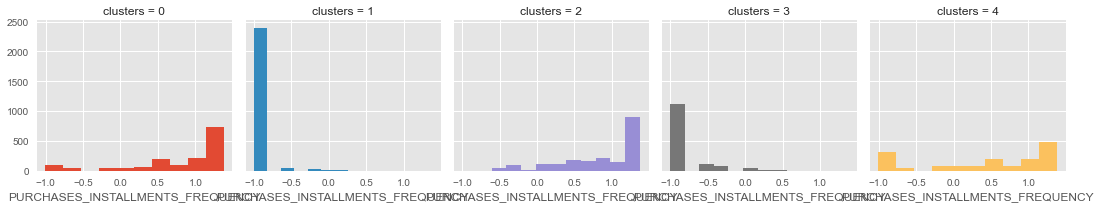

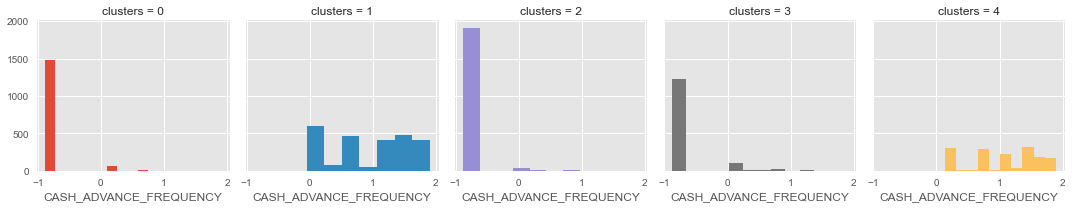

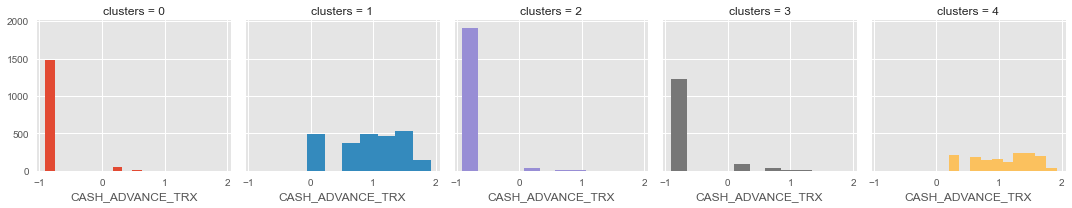

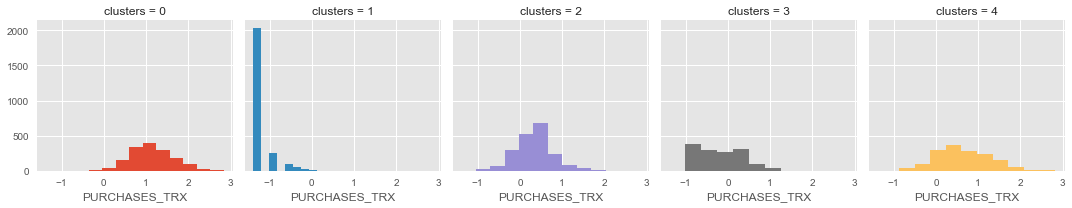

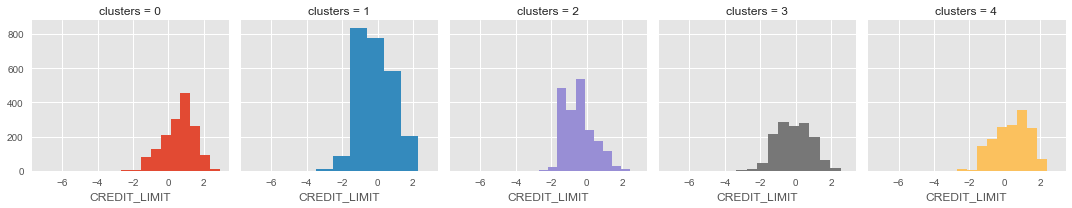

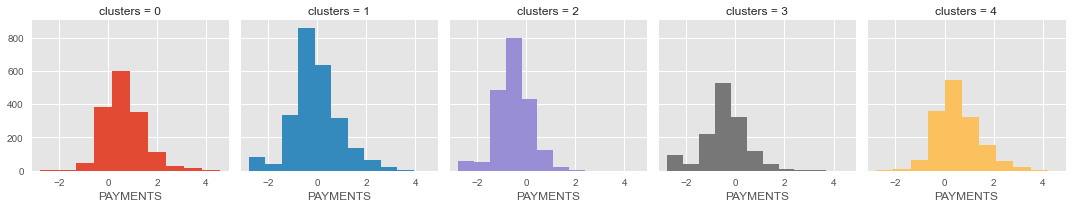

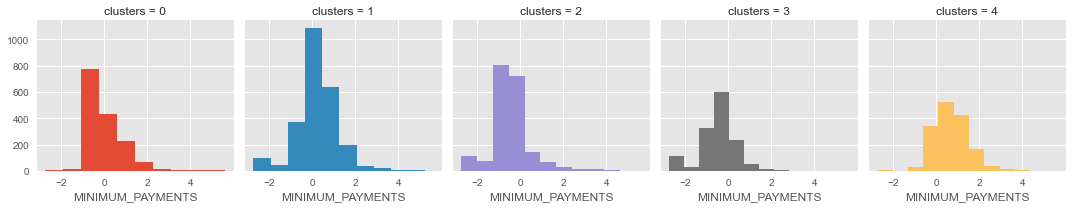

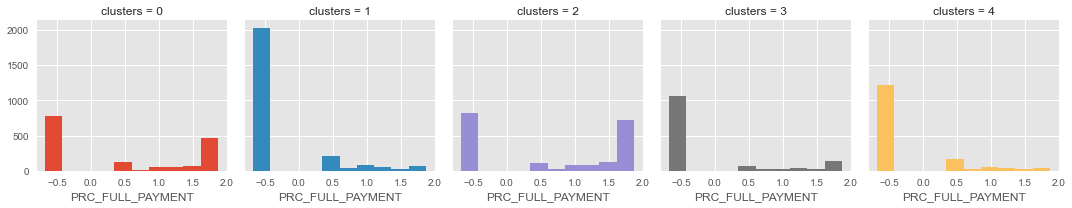

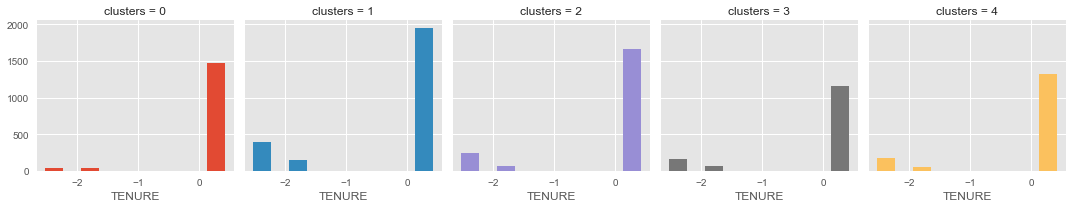

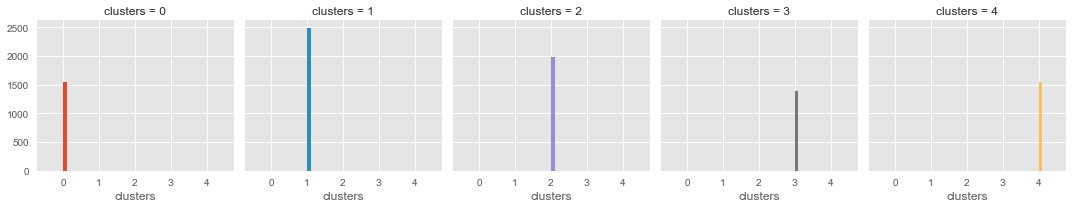

In [31]:
for i in df_kmeans:
    grid= sns.FacetGrid(df_kmeans, col='clusters', hue='clusters')
    grid.map(plt.hist, i)

#### PCA KMeans

Principal component analysis (PCA) adalah metode yang digunakan dalam unsupervised machine learning yang mereduksi data berdimensi tinggi menjadi dimensi yang lebih kecil sambil mempertahankan informasi sebanyak mungkin. Pada project ini, jumlah fitur akan dikurangi menjadi 2 dimensi sehingga hasil clustering dapat divisualisasikan

In [32]:
pca=PCA(n_components=2)
data_pca =pca.fit_transform(df_new2)

In [33]:
pca_km = pd.DataFrame(data = data_pca, columns =['pca1','pca2'])
pca_km.head()

pca1      pca2
0 -0.340356 -3.033363
1 -3.447069  0.982592
2  1.381542  1.087780
3 -1.203609 -1.556623
4 -1.044708 -1.357296

In [34]:
pca_km = pd.concat([pca_km, df_kmeans.clusters], axis=1)
pca_km

pca1      pca2  clusters
0    -0.340356 -3.033363         2
1    -3.447069  0.982592         1
2     1.381542  1.087780         3
3    -1.203609 -1.556623         3
4    -1.044708 -1.357296         3
...        ...       ...       ...
8945  1.727544 -2.797649         2
8946  1.443606 -3.154538         2
8947  1.163721 -3.527569         2
8948 -2.963677 -3.610365         1
8949 -0.416649 -0.466542         3

[8950 rows x 3 columns]

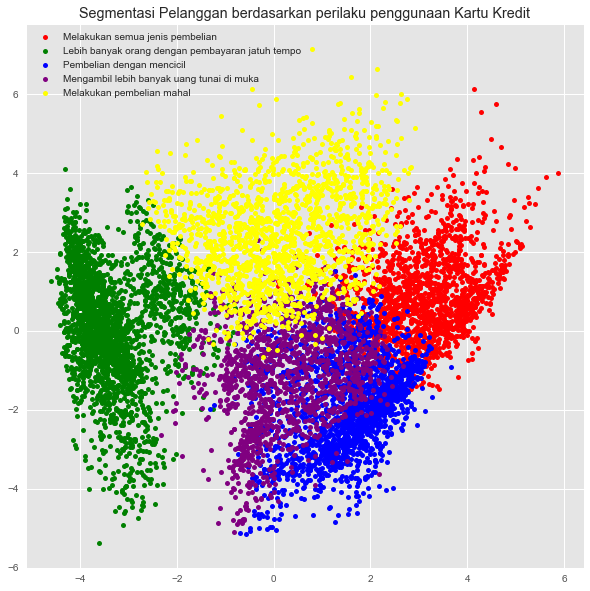

In [35]:
x, y = pca_km['pca1'], pca_km['pca2']

colors = {0: 'red',
          1: 'green',
          2: 'blue',
          3: 'purple',
          4: 'yellow'}

names = {0: 'Melakukan semua jenis pembelian',
         1: 'Lebih banyak orang dengan pembayaran jatuh tempo',
         2: 'Pembelian dengan mencicil',
         3: 'Mengambil lebih banyak uang tunai di muka',
         4: 'Melakukan pembelian mahal'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 10))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Segmentasi Pelanggan berdasarkan perilaku penggunaan Kartu Kredit")
plt.show()

Berdasarkan PCA diatas, cluster 2 dan 3 sangat berdekatan, bahkan agak bercampur. Sehingga, perlu diinvestigasi lebih lanjut, apakah cluster 2 dan 3 sebenarnya merupakan 1 cluster atau 2 cluster yang berbeda.
Berdasarkan facetgrid di atas, dapat diketahui beberapa perbedaan antara cluster 2 dan 3, antara lain:

*   ONOFF_PURCHASES pada cluster 3 cenderung lebih tinggu daripada cluster 2
*   INSTALLMENTS_PURCHASES pada cluster 2 cenderung lebih tinggi daripada cluster 3
*   PURCHASES_FREQUENCY pada cluster 2 cenderung lebih banyak daripada cluster 3

Dengan begitu, dapat disimpulkan cluster 2 dan 3 berbeda




### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah algoritma clustering yang berbasis kepadatan. Algoritma ini bekerja dengan mencari titik-titik inti yang memiliki kepadatan lokal yang cukup tinggi, kemudian membentuk klaster dengan menghubungkan titik-titik inti yang saling terhubung melalui tetangga-tetangga mereka. DBSCAN mengidentifikasi klaster berdasarkan jarak maksimum (eps) antara titik-titik, di mana dua titik yang jaraknya kurang dari atau sama dengan eps dianggap sebagai tetangga.

In [36]:
pca=PCA(n_components=3)
data_pca =pca.fit_transform(df_new2)

pca_dbs = pd.DataFrame(data = data_pca, columns =['pca1','pca2', 'pca3'])
pca_dbs.head()

pca1      pca2      pca3
0 -0.340356 -3.033364 -0.251868
1 -3.447069  0.982592 -0.275658
2  1.381542  1.087780  2.238826
3 -1.203609 -1.556623  2.537036
4 -1.044708 -1.357296  0.995850

### DBSCAN Model 1


In [37]:
dbs = DBSCAN(eps = 0.65, min_samples = 30).fit(pca_dbs)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(dbs.labels_)))]

pca_dbs["DBS Cluster"] = dbs.labels_

pca_dbs["DBS Cluster"].value_counts()

 0    8481
-1     440
 1      29
Name: DBS Cluster, dtype: int64

In [38]:
pca_dbs

pca1      pca2      pca3  DBS Cluster
0    -0.340356 -3.033364 -0.251868            0
1    -3.447069  0.982592 -0.275658            0
2     1.381542  1.087780  2.238826            0
3    -1.203609 -1.556623  2.537036           -1
4    -1.044708 -1.357296  0.995850            0
...        ...       ...       ...          ...
8945  1.727544 -2.797649 -1.836279            0
8946  1.443606 -3.154538 -1.470617            0
8947  1.163721 -3.527569 -1.334483            0
8948 -2.963677 -3.610365 -0.001271            0
8949 -0.416649 -0.466542  2.192710            0

[8950 rows x 4 columns]

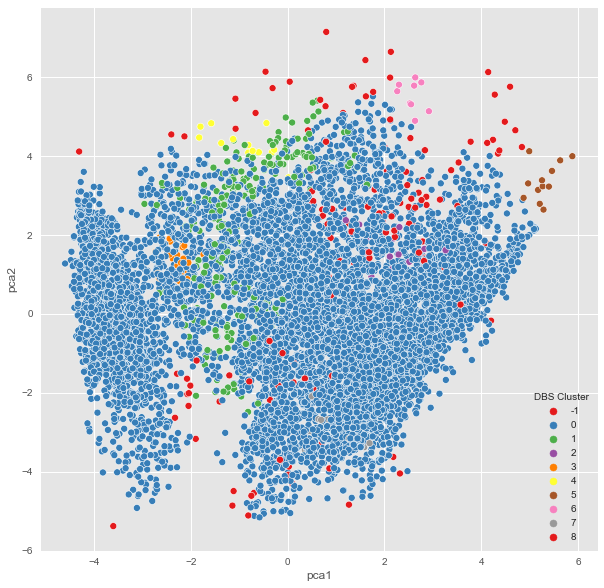

In [53]:
plt.figure(figsize=(10,10))
palette = sns.color_palette('Set1', n_colors=len(pca_dbs['DBS Cluster'].unique()))

ax = sns.scatterplot(x="pca1", y="pca2", hue = "DBS Cluster", data = pca_dbs, palette = palette)
plt.show()

Dari hasil yang ditampilkan oleh DBSCAN Model 1 diatas, terlihat bahwa terlalu banyak nilai noise dan jumlah cluster yang kurang relevan. Oleh karenanya, dilakukan analisis dan pemodelan lebih lanjut seperti
pada Model 2 berikut ini.

### DBSCAN Model 2

#### Hitung jarak titik terdekat menggunakan KNN

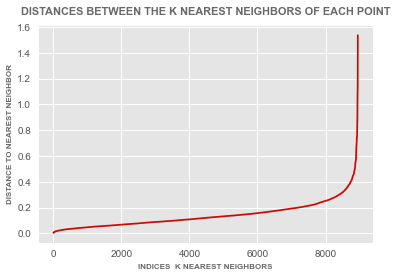

In [41]:
# NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2).fit(pca_dbs)

# Calculating the distances and indices of the k nearest neighbors
distances, indices = nbrs.kneighbors(pca_dbs)

# Plot
plt.plot(sorted(distances[:,1]), 'r-')
plt.title('DISTANCES BETWEEN THE K NEAREST NEIGHBORS OF EACH POINT', fontsize = 11, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('INDICES  K NEAREST NEIGHBORS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('DISTANCE TO NEAREST NEIGHBOR', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Objek NearestNeighbors digunakan untuk menghitung jarak antara titik-titik terdekat. Grafik yang dihasilkan menunjukkan jarak-jarak yang diurutkan, sehingga memungkinkan pemilihan nilai eps yang sesuai. Titik di mana grafik mulai tumbuh dengan cepat merupakan kandidat yang baik untuk nilai eps, karena menunjukkan bahwa kluster-kuster sedang terbentuk. Dalam hal ini, kita dapat melihat bahwa nilai eps di mana pertumbuhan grafik terjadi adalah dengan nilai 0.05.

Namun, penting untuk mempertimbangkan bahwa nilai min_samples berinteraksi dengan nilai eps, sehingga perlu menguji kombinasi nilai eps dan min_samples yang berbeda. Kami akan menggunakan GridSearchCV untuk mencari kombinasi terbaik antara kedua parameter ini.

In [42]:
param_grid = {'eps':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10], 'min_samples':[2,5,10, 20, 30, 40, 50, 60, 70]}

dbscan = DBSCAN()

grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_score)

grid_search.fit(pca_dbs)
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'eps': 0.01, 'min_samples': 2}


In [43]:
db1 = DBSCAN(eps=0.01, min_samples=2).fit(pca_dbs)

labels = db1.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 10
Estimated number of noise points: 8930


Jumlah noise points yang terlalu besar untuk melakukan analisis segmentasi.

Berikut adalah model DBSCAN dengan epsilon = 0.8 dan minimum sample = 8

In [44]:
db = DBSCAN(eps=0.8, min_samples=8).fit(pca_dbs)

labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 129


In [45]:
labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]

pca_dbs["DBS Cluster"] = db.labels_

pca_dbs["DBS Cluster"].value_counts()

 0    8481
 1     233
-1     129
 3      29
 2      19
 7      13
 4      13
 8      12
 5      12
 6       9
Name: DBS Cluster, dtype: int64

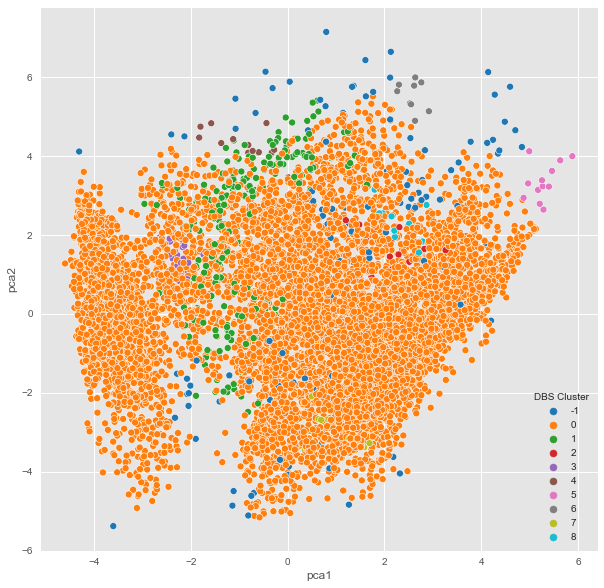

In [54]:
num_clusters = len(pca_dbs['DBS Cluster'].unique())

color_palette = sns.color_palette("tab10", num_clusters)

plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="DBS Cluster", data=pca_dbs, palette=color_palette)
plt.show()

Dari hasil clustering menggunakan algoritma DBSCAN, terdapat banyak kluster yang dihasilkan, termasuk beberapa kluster dengan ukuran yang sangat kecil. Kluster-kluster ini mungkin kurang relevan dan tidak memberikan pemahaman yang jelas tentang pola atau kelompok data yang ada. Sebelumnya, kami juga telah mencoba clustering menggunakan model K-Means yang menghasilkan 5 kluster dengan distribusi yang lebih seimbang.

Berdasarkan ini, kami memutuskan untuk menggunakan model K-Means sebagai pilihan kami. Model K-Means dengan 5 kluster memberikan segmentasi yang lebih terfokus dan memberikan informasi yang lebih berarti dalam pemahaman mengenai data.

## Model Inference

In [55]:
df.head()

x         y  label
0 -0.340356 -3.033363      2
1 -3.447069  0.982592      1
2  1.381542  1.087780      3
3 -1.203609 -1.556623      3
4 -1.044708 -1.357296      3

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       8950 non-null   float64
 1   y       8950 non-null   float64
 2   label   8950 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 174.9 KB


In [57]:
BALANCE = float(input("BALANCE: "))
BALANCE_FREQUENCY = float(input("BALANCE_FREQUENCY: "))
PURCHASES = float(input("PURCHASES: "))
ONEOFF_PURCHASES = float(input("ONEOFF_PURCHASES: "))
INSTALLMENTS_PURCHASES = float(input("INSTALLMENTS_PURCHASES: "))
CASH_ADVANCE = float(input("CASH_ADVANCE: "))
PURCHASES_FREQUENCY = float(input("PURCHASES_FREQUENCY: "))
ONEOFF_PURCHASES_FREQUENCY = float(input("ONEOFF_PURCHASES_FREQUENCY: "))
PURCHASES_INSTALLMENTS_FREQUENCY = float(input("PURCHASES_INSTALLMENTS_FREQUENCY: "))
CASH_ADVANCE_FREQUENCY = float(input("CASH_ADVANCE_FREQUENCY: "))
CASH_ADVANCE_TRX = float(input("CASH_ADVANCE_TRX: "))
PURCHASES_TRX = float(input("PURCHASES_TRX: "))
CREDIT_LIMIT = float(input("CREDIT_LIMIT: "))
PAYMENTS = float(input("PAYMENTS: "))
MINIMUM_PAYMENTS = float(input("MINIMUM_PAYMENTS: "))
PRC_FULL_PAYMENT = float(input("PRC_FULL_PAYMENT: "))
TENURE = float(input("TENURE: "))

feature = [
    BALANCE,
    BALANCE_FREQUENCY,
    PURCHASES,
    ONEOFF_PURCHASES,
    INSTALLMENTS_PURCHASES,
    CASH_ADVANCE,
    PURCHASES_FREQUENCY,
    ONEOFF_PURCHASES_FREQUENCY,
    PURCHASES_INSTALLMENTS_FREQUENCY,
    CASH_ADVANCE_FREQUENCY,
    CASH_ADVANCE_TRX,
    PURCHASES_TRX,
    CREDIT_LIMIT,
    PAYMENTS,
    MINIMUM_PAYMENTS,
    PRC_FULL_PAYMENT,
    TENURE
]

feature = scaler.fit_transform([feature])
predict = kmeans.predict(feature)

print("Cluster : " , predict)


Cluster :  [3]


## Kesimpulan

1. Metode clustering yang digunakan pada dataset ini adalah K-MEans dan DBSCAN. Namun, berdasarkan visualisasi PCA dan silhouette score, dapat disimpulkan bahwa K-Means menghasilkan kualitas pengelompokkan yang paling baik.

2. Berdasarkan hasil clustering dengan K-Means terhadap data pengguna kartu kredit, dapat disimpulkan bahwa terdapat 5 kluster yang masing-masing memiliki kriteria berbeda.